There are many simple operations, which are often used by programmers in R. 
Here I try to create a simple mapping of how to perform them in Python, with equivalent R code in comments. 

Note that I am still a student in R as well as in python, so please contact me, if you can suggest a better way to perform the operations described.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a array with 10 integers
# R: x = c(1:10)
x = np.linspace(1, 10, 10)
print(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [3]:
# Get Size & Type of object
# R: print(paste("Type:", class(x), "Length:", length(x)))
print('Type: ' + str(type(x)) + 'Length: ' + str(len(x)))

Type: <class 'numpy.ndarray'>Length: 10


In [4]:
# Create a combination grid
# R: grid = expand.grid(x = c(1:3), y = c(1:3))
x = np.linspace(1, 3, 3)
y = np.linspace(1, 3, 3)

mesh = np.meshgrid(x, y)
#print(mesh)
vstk = np.vstack((mesh[0].ravel(), mesh[1].ravel()))
#print(vstk)
grid = vstk.T
grid

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [1., 2.],
       [2., 2.],
       [3., 2.],
       [1., 3.],
       [2., 3.],
       [3., 3.]])

<BarContainer object of 10 artists>

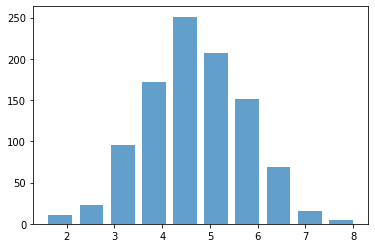

In [5]:
# Generate a Normally distributed Sample and create a histogram for it
# R: norm_data = rnorm(n = 1000, mean = 5, sd = 1)
#    > hist(norm_data)
norm_data = np.random.normal(loc = 5, scale = 1, size = 1000)
n_hist, n_bins = np.histogram(norm_data)
plt.bar(n_bins[:-1], n_hist, width=0.5, alpha=0.7)

<BarContainer object of 10 artists>

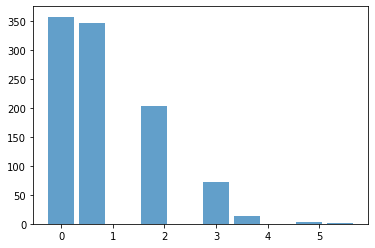

In [6]:
# Generate a Poisson distributed Sample and create a histogram for it
# R: pois_data = rpois(n = 1000, lambda = 1)
#    > hist(pois_data)
pois_data = np.random.poisson(lam = 1, size = 1000)
p_hist, p_bins = np.histogram(pois_data)
plt.bar(p_bins[:-1], p_hist, width=0.5, alpha=0.7)

In [7]:
#Create a Data Frame
# R: d = data.frame(A=c(1:5), B=c(6:10))
data = {'A' : [1,2,3,4,5], 'B' : [6,7,8,9,10]}
d = pd.DataFrame(data)
d

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [41]:
# Load a pre-built dataset eg 'iris'
#R : data("iris")

# Although iris and other datasets are present in pandas, sklearn etc as shown below. 
# This statsmodel packages was interesting. 
# import statsmodels.api as sm
# iris = sm.datasets.get_rdataset('iris').data
from sklearn import datasets
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data.data)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df['target'] = ""
iris_df.loc[0:49, 'target'] = 'setosa'
iris_df.loc[50:99, 'target'] = 'versicolor'
iris_df.loc[100:149, 'target'] = 'virginica'
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Apply Groupby & Summarize Operations (dplyr)
# R: library(dplyr)
#  avg_len = iris %>% group_by(Species) %>% summarise(Avg_Sepal_Length = mean(Sepal.Length))

avg_len = iris_df.groupby('target').agg({'sepal_length':'mean'})
avg_len = avg_len.reset_index()
avg_len


,target,sepal_length
0,setosa,5.006
1,versicolor,5.936
2,virginica,6.588


In [19]:
# Gather Operation - Create 2 columns from a group of columns
#R Although melt function is present in R as well, I am a big fan of tidyr & chaining.
#  library(tidyr)
#  iris2 = iris %>% gather(key = "Flower_Param", value = "Flower_Value", -Species)
iris2 = iris_df.melt(id_vars = ['target'], var_name = 'Flower_Param', value_name = 'Flower_Value')
iris2.head()

,target,Flower_Param,Flower_Value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


In [44]:
# Spread Operation (Pivot)
# We change the target value in iris to showcase Gather & Spread Operation Together
# R: iris$Species = paste(row.names(iris), iris$Species)
#    iris2 = iris %>% gather(key = "Flower_Param", value = "Flower_Value", -Species)
#    iris3 = iris2 %>% spread(key = "Flower_Param", value = "Flower_Value")
iris_df['target'] = iris_df.index.values.astype(str) + iris_df['target']
iris2 = iris_df.melt(id_vars = ['target'], var_name = 'Flower_Param', value_name = 'Flower_Value')
iris3 = iris2.pivot(index = 'target', columns = 'Flower_Param', values = 'Flower_Value')
iris3 = iris3.reset_index()
iris3

Flower_Param,target,petal_length,petal_width,sepal_length,sepal_width
0,0setosa,1.4,0.2,5.1,3.5
1,100virginica,6.0,2.5,6.3,3.3
2,101virginica,5.1,1.9,5.8,2.7
3,102virginica,5.9,2.1,7.1,3.0
4,103virginica,5.6,1.8,6.3,2.9
5,104virginica,5.8,2.2,6.5,3.0
6,105virginica,6.6,2.1,7.6,3.0
7,106virginica,4.5,1.7,4.9,2.5
8,107virginica,6.3,1.8,7.3,2.9
9,108virginica,5.8,1.8,6.7,2.5


# References:
1. https://jamesrledoux.com/code/group-by-aggregate-pandas
2. https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
3. https://blog.rstudio.com/2014/07/22/introducing-tidyr/